In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [20]:

s_data = pd.read_excel("student data.xlsx")
print("Data is imported")
s_data.head(10)

Data is imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting data on 2D graph

TypeError: 'str' object is not callable

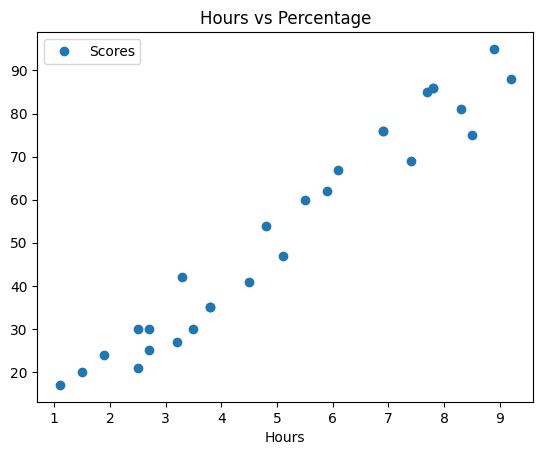

In [21]:
import matplotlib.pyplot as plt

# Assuming 's_data' is a DataFrame with 'Hours' and 'Scores' columns
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


Preparing the Data


In [22]:
x = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

In [23]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y ,
                                                     test_size = 0.2, random_state = 0)

Trainnig the algorithm

In [25]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   28 non-null     float64
 1   Scores  28 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 580.0 bytes


In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training Complete")

Training Complete


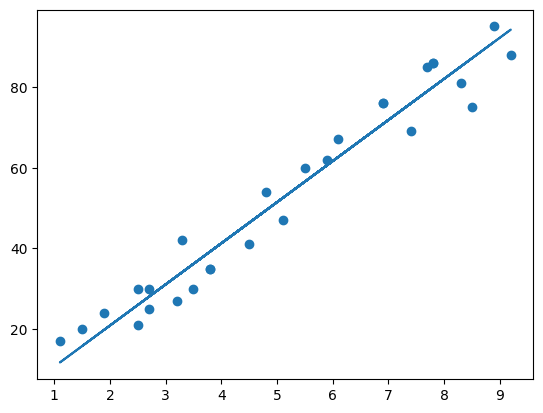

In [29]:
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [31]:
print(x_test) 
y_pred = regressor.predict(x_test) 

[[3.2]
 [3.8]
 [1.1]
 [1.9]
 [1.5]
 [5.9]]


In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,27,33.123454
1,35,39.233640
2,17,11.737803
3,24,19.884718
4,20,15.811261
5,62,60.619290


In [34]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.217336888947053
